In [1]:
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
import seaborn
from scipy import stats

# Data preprocession
df = pd.read_csv('data1.csv', sep='\,', engine='python')
df['"Version'] = df['"Version'].str.replace('"','')
df['Collection complete"'] = df['Collection complete"'].str.replace('"','')
df.columns = df.columns.str.replace('"','')
df['Collection complete'] = df['Collection complete'].astype(int)

In [31]:
# Random sampling of 2111 levels for Version 1 to equalize it in number with 2111 samples given in the Version 2
df1 = df[df['Version']=='v1'].sample(2111)
df2 = df[df['Version']=='v2']
df.head()

,Version,id,Level,M3 start,M3 finish,Crystall free,Get gold,Get food,Get stuff,Buy gold,...,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge (gold),Buy charge (crystall),Buy amulet (gold),Buy amulet (crystall),Collection complete
0,v2,958203,1,5,5,5,1069,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1,v1,519908,10,184,156,19,57252,28704,25584,1145,...,512,76,9,16,4,21,12,10,6,4
2,v2,888712,7,93,78,17,30186,8112,5928,1207,...,59,10,27,13,6,12,4,7,5,3
3,v1,571031,4,38,32,11,6784,1184,1768,271,...,0,16,6,10,0,6,3,2,0,2
4,v2,911796,3,27,26,9,4966,780,0,248,...,0,0,5,4,1,1,0,2,0,0


In [ ]:
'''
First of all, using statistics tools we determine whether the change in the velocity of 
bonus production in totems had a positive or negative effect on the game. 

We conduct a statistical significance analysis of means of Level for each version, 
to determine if there was a real difference in Level as a result of the change, or whether 
it was for an error given the difference between gamers in the versions. 

In addition, we analyze frequency distribution of Level for each version
'''

In [32]:
# For each version we take a maximum level that each unique player (id) achieved. 
# Then we look at the means the maximum level that each unique player 
# to use it for a statistical significance analysis.

a=df1.groupby(['id']).max()
a.describe()

,Level,M3 start,M3 finish,Crystall free,Get gold,Get food,Get stuff,Buy gold,Buy food,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge (gold),Buy charge (crystall),Buy amulet (gold),Buy amulet (crystall),Collection complete
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,7.454849,132.591973,102.093645,16.709030,35391.892977,15056.525084,13639.177258,1311.053512,720.478261,360.735786,45.344482,26.408027,15.933110,5.949833,17.347826,6.561873,5.608696,4.876254,3.234114
std,2.698583,60.591885,54.008121,6.179552,22354.674958,11582.832155,11111.272521,749.486507,490.393667,293.838312,25.758006,10.875164,8.735998,3.231684,8.870021,3.735197,2.686792,2.499947,1.494522
min,1.000000,4.000000,4.000000,5.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,90.000000,54.000000,11.000000,15092.000000,3860.500000,2471.000000,659.000000,244.500000,70.000000,25.000000,23.000000,9.000000,3.000000,11.000000,3.000000,3.000000,3.000000,2.000000
50%,8.000000,167.000000,99.000000,18.000000,33024.000000,12768.000000,11155.000000,1448.000000,824.000000,346.000000,46.000000,29.000000,15.000000,6.000000,17.000000,7.000000,6.000000,6.000000,4.000000
75%,10.000000,184.000000,153.500000,22.000000,57565.500000,26536.000000,25146.500000,1877.500000,1115.000000,589.500000,69.000000,34.000000,23.000000,9.000000,26.000000,10.000000,8.000000,7.000000,4.000000
max,10.000000,200.000000,180.000000,27.000000,68220.000000,34905.000000,31683.000000,2774.000000,1602.000000,950.000000,90.000000,44.000000,35.000000,12.000000,30.000000,12.000000,10.000000,8.000000,5.000000


In [33]:
# We see that on average a player passed 7.5 levels in the version 1.
# While in version 2 he passed 7 levels, which is 0.5 levels  less 
# compared to the version 1. Let`s check these findings for a statistical significance test below
b=df2.groupby(['id']).max()
b.describe()

,Level,M3 start,M3 finish,Crystall free,Get gold,Get food,Get stuff,Buy gold,Buy food,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge (gold),Buy charge (crystall),Buy amulet (gold),Buy amulet (crystall),Collection complete
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,7.036667,148.043333,93.980000,17.516667,36563.926667,15312.050000,12990.533333,650.533333,311.593333,159.156667,14.556667,41.496667,15.080000,7.560000,19.713333,6.746667,6.946667,4.736667,4.353333
std,2.688136,69.057061,50.050873,6.536984,23427.802329,12349.097437,11317.355164,359.954627,206.330728,120.350987,9.076420,18.562828,8.148308,3.758567,11.836589,4.543637,3.553295,2.284305,2.805004
min,1.000000,4.000000,4.000000,5.000000,1053.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,108.000000,57.000000,13.000000,18810.000000,5065.500000,2928.000000,357.500000,129.000000,48.500000,8.000000,37.000000,9.000000,5.000000,12.000000,3.000000,4.000000,3.000000,2.000000
50%,8.000000,191.000000,93.000000,17.000000,35422.500000,13584.000000,11507.500000,625.000000,299.000000,156.000000,14.000000,48.500000,14.000000,8.000000,16.000000,6.000000,7.000000,6.000000,4.000000
75%,10.000000,210.000000,146.250000,23.250000,61468.000000,29070.000000,26350.500000,921.250000,440.250000,269.000000,22.000000,55.000000,21.000000,10.000000,32.000000,11.000000,10.000000,7.000000,7.000000
max,10.000000,220.000000,176.000000,30.000000,75864.000000,38640.000000,33088.000000,1362.000000,773.000000,378.000000,34.000000,64.000000,33.000000,14.000000,40.000000,15.000000,13.000000,7.000000,9.000000


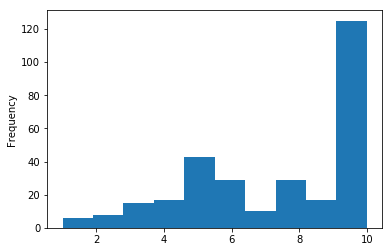

In [40]:
# To decide which test to use we have to check whether the data follows the normal distribution pattern
a['Level'].plot(kind='hist')

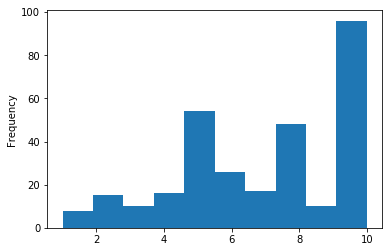

In [55]:
b['Level'].plot(kind='hist')

In [42]:
# We can see that the data is not normally distributed. Thus it would be more accurate to use a non-parametric test
# Hence I use Mann-Whitney rank test, which is the non-parametric version of the 2 independent samples t-test
# Before it we make a hypothesis 
'''
H0:μ1−μ2 = 0, 
Ha:μ1−μ2 > 0 

Significance level:
α=0.05
'''
# Looking at the p-value (0.019), we see that at 5% level of significance, the data provides sufficient evidence that 
# mean of Level in version 1 is greater than mean of Level in version 2.
stats.mannwhitneyu(np.asarray(a['Level']),np.asarray(b['Level'])) 

MannwhitneyuResult(statistic=40615.0, pvalue=0.019700343896718438)

In [59]:
# We can check the result of Mann-Whitney rank test with Kruskal-Wallis H-test for independent samples, 
# which is a non-parametric version of ANOVA. Anova requires equal variances between the data, 
# and indeed, we have around the same standard deviations, 2.698583 for Level of version 1 and 2.688136 
# for Level of version 2.

# Here also, looking at the p-value (0.039) at 5% level of significance, the data provides sufficient evidence that 
# mean of Level in version 1 is greater than mean of Level in version 2.
stats.kruskal(a['Level'], b['Level'])

KruskalResult(statistic=4.2445096616260747, pvalue=0.039377439254220138)

In [61]:
# Now in deeper details we analyze how many players achieved Level 10 for each version
# As a result of the change in the game, the retention rate declined by 24% 
# from 125/299 to 96/300 players
a['Level'].value_counts()

10    125
5      43
8      29
6      29
9      17
4      17
3      15
7      10
2       8
1       6
Name: Level, dtype: int64

In [46]:
b['Level'].value_counts()

10    96
5     54
8     48
6     26
7     17
4     16
2     15
9     10
3     10
1      8
Name: Level, dtype: int64

In [58]:
'''
Next, looking at the tables below it can easily be determined on which variables the change in the game had the 
greatest effect. We can see that means of variables Get bonus, Buy bonus, Buy gold, Buy food,
Buy stuff changed the most. Given the magnitude of change in means of the variables and the absence of outliers,
it can be inferred that mean differences between the versions are statistically significant.

The changes in the rest of the variables are trivial to account for the fall in 
the Retention rate to significant extent and the game as a whole.

'''
# Changes in Buy gold, Buy food, Buy stuff are close to each other
print('Buy gold:', str((283.102321-614.589294)/614.589294*100)+'%')
print('Buy food:', str((135.302700-301.320701)/301.320701*100)+'%')
print('Buy stuff:', str((59.186168-124.038844)/124.038844*100)+'%')

print('Get bonus:', str((6.503553-20.931312)/20.931312*100)+'%')
print('Buy bonus:', str((18.908100-9.844150)/9.844150*100)+'%')

('Buy gold:', '-53.9363402904%')
('Buy food:', '-55.0967790958%')
('Buy stuff:', '-52.2841667244%')
('Get bonus:', '-68.9290714314%')
('Buy bonus:', '92.074480783%')


In [51]:
df1.describe()

,id,Level,M3 start,M3 finish,Crystall free,Get gold,Get food,Get stuff,Buy gold,Buy food,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge (gold),Buy charge (crystall),Buy amulet (gold),Buy amulet (crystall),Collection complete
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,583764.049266,4.744197,67.538607,52.133586,10.852676,15598.879204,5444.557082,4552.636191,614.589294,301.320701,124.038844,20.931312,9.844150,8.101847,2.638560,8.599242,3.015159,3.110374,2.416390,1.711511
std,68159.038094,2.741628,57.976906,43.117300,5.081851,16343.485454,7250.116185,6839.864061,626.711428,369.622854,194.522527,21.810831,9.867985,6.582006,2.782922,7.742630,3.211909,2.337139,2.359512,1.587467
min,466050.000000,1.000000,4.000000,4.000000,5.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,523406.000000,2.000000,18.000000,17.000000,7.000000,1872.000000,1057.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,584567.000000,4.000000,40.000000,34.000000,10.000000,7712.000000,1536.000000,2044.000000,387.000000,113.000000,0.000000,17.000000,6.000000,6.000000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000
75%,645057.000000,7.000000,95.000000,76.000000,13.500000,26123.500000,7137.000000,5544.000000,1001.500000,449.500000,169.500000,34.000000,11.000000,11.000000,4.000000,13.000000,5.000000,5.000000,4.000000,3.000000
max,697041.000000,10.000000,200.000000,180.000000,27.000000,68220.000000,34905.000000,31683.000000,2774.000000,1602.000000,950.000000,90.000000,44.000000,35.000000,12.000000,30.000000,12.000000,10.000000,8.000000,5.000000


In [52]:
df2.describe()

,id,Level,M3 start,M3 finish,Crystall free,Get gold,Get food,Get stuff,Buy gold,Buy food,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge (gold),Buy charge (crystall),Buy amulet (gold),Buy amulet (crystall),Collection complete
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,917810.720512,4.530081,71.562293,49.720985,11.558029,16428.615348,5716.321649,4587.380862,283.102321,135.302700,59.186168,6.503553,18.908100,7.909995,3.353387,9.621980,2.973946,3.655613,2.336807,2.018948
std,40789.355221,2.639460,64.182462,40.350400,5.651181,17538.829136,7761.537557,6901.615388,275.496482,151.961952,85.629567,7.219632,18.847482,6.203916,3.576276,9.278634,3.441010,3.024750,2.290463,2.163379
min,851771.000000,1.000000,4.000000,4.000000,5.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,884183.000000,2.000000,18.000000,17.000000,7.000000,1760.000000,1022.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,909790.000000,4.000000,42.000000,36.000000,11.000000,7500.000000,1850.000000,2494.000000,226.000000,83.000000,0.000000,6.000000,8.000000,7.000000,2.000000,10.000000,2.000000,3.000000,2.000000,2.000000
75%,955779.000000,6.000000,109.000000,69.000000,15.000000,23604.000000,6780.500000,5217.500000,386.500000,195.000000,102.000000,11.000000,36.000000,11.000000,6.000000,15.000000,5.000000,6.000000,4.000000,3.000000
max,987612.000000,10.000000,220.000000,176.000000,30.000000,75864.000000,38640.000000,33088.000000,1362.000000,773.000000,378.000000,34.000000,64.000000,33.000000,14.000000,40.000000,15.000000,13.000000,7.000000,9.000000


In [80]:
# This variable can also be used in the future analysis when there are more data available
df[df['Version']=='v1'].sample(2111)['M3 start'].sum()

142067L

In [81]:
df[df['Version']=='v2']['M3 start'].sum()

151068L

In [82]:
# Percentage of successfully completed Match-3 level for a Level. 
# This variable can also be used in the future analysis when there are more data available
df['M3_success']=df['M3 finish']/df['M3 start']*100
df3 = df.drop(['M3 start', 'M3 finish'], 1)
cols = df3.columns.tolist()
cols = cols[0:2] + cols[-1:] + cols[2:-1]
df3=df3[cols]
df3.head()

,Version,id,M3_success,Level,Crystall free,Get gold,Get food,Get stuff,Buy gold,Buy food,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge (gold),Buy charge (crystall),Buy amulet (gold),Buy amulet (crystall),Collection complete
0,v2,958203,100.000000,1,5,1069,0,0,0,0,0,0,0,2,0,0,0,0,0,0
1,v1,519908,84.782609,10,19,57252,28704,25584,1145,861,512,76,9,16,4,21,12,10,6,4
2,v2,888712,83.870968,7,17,30186,8112,5928,1207,406,59,10,27,13,6,12,4,7,5,3
3,v1,571031,84.210526,4,11,6784,1184,1768,271,83,0,16,6,10,0,6,3,2,0,2
4,v2,911796,96.296296,3,9,4966,780,0,248,47,0,0,5,4,1,1,0,2,0,0


In [69]:
df4 = df3[df3['Version']=='v1'].sample(2111)
df4.describe()

,id,M3_success,Level,Crystall free,Get gold,Get food,Get stuff,Buy gold,Buy food,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge (gold),Buy charge (crystall),Buy amulet (gold),Buy amulet (crystall),Collection complete
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,583348.447181,84.861205,4.731881,10.855045,15577.895784,5439.423022,4551.182378,612.281383,301.145902,123.949313,20.909522,9.995737,8.096163,2.657508,8.562293,2.989578,3.099953,2.421127,1.702037
std,67855.097876,14.226087,2.742006,5.088862,16357.425357,7262.449725,6872.055137,623.658950,370.179822,194.794591,21.824241,10.051973,6.578274,2.804987,7.740077,3.202914,2.339635,2.356459,1.584519
min,466050.000000,50.000000,1.000000,5.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,523406.000000,84.126984,2.000000,7.000000,1846.500000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,583944.000000,88.571429,4.000000,10.000000,7719.000000,1550.000000,2054.000000,391.000000,114.000000,0.000000,17.000000,7.000000,6.000000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000
75%,644674.000000,93.750000,7.000000,13.500000,26007.000000,7126.500000,5525.000000,996.500000,441.500000,167.500000,34.000000,12.000000,11.000000,4.000000,13.000000,5.000000,5.000000,4.000000,3.000000
max,697041.000000,100.000000,10.000000,27.000000,68220.000000,34905.000000,31683.000000,2774.000000,1602.000000,950.000000,90.000000,44.000000,35.000000,12.000000,30.000000,12.000000,10.000000,8.000000,5.000000


In [70]:
df5 = df3[df3['Version']=='v2'].sample(2111)
df5.describe()

,id,M3_success,Level,Crystall free,Get gold,Get food,Get stuff,Buy gold,Buy food,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge (gold),Buy charge (crystall),Buy amulet (gold),Buy amulet (crystall),Collection complete
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,917810.720512,81.378798,4.530081,11.558029,16428.615348,5716.321649,4587.380862,283.102321,135.302700,59.186168,6.503553,18.908100,7.909995,3.353387,9.621980,2.973946,3.655613,2.336807,2.018948
std,40789.355221,17.003348,2.639460,5.651181,17538.829136,7761.537557,6901.615388,275.496482,151.961952,85.629567,7.219632,18.847482,6.203916,3.576276,9.278634,3.441010,3.024750,2.290463,2.163379
min,851771.000000,44.859813,1.000000,5.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,884183.000000,74.666667,2.000000,7.000000,1760.000000,1022.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,909790.000000,84.210526,4.000000,11.000000,7500.000000,1850.000000,2494.000000,226.000000,83.000000,0.000000,6.000000,8.000000,7.000000,2.000000,10.000000,2.000000,3.000000,2.000000,2.000000
75%,955779.000000,94.444444,6.000000,15.000000,23604.000000,6780.500000,5217.500000,386.500000,195.000000,102.000000,11.000000,36.000000,11.000000,6.000000,15.000000,5.000000,6.000000,4.000000,3.000000
max,987612.000000,100.000000,10.000000,30.000000,75864.000000,38640.000000,33088.000000,1362.000000,773.000000,378.000000,34.000000,64.000000,33.000000,14.000000,40.000000,15.000000,13.000000,7.000000,9.000000


In [89]:
'''
H0:μ1−μ2 = 0, 
Ha:μ1−μ2 > 0 

Significance level:
α=0.05
'''
# Given a huge amount of data, looking at the p-value we see that at 5% level of significance, the data 
# provides sufficient evidence that mean of M3_success in version 1 is greater than mean of M3_success in version 2.
stats.mannwhitneyu(np.asarray(df4['M3_success']),np.asarray(df5['M3_success'])) 

MannwhitneyuResult(statistic=1933071.0, pvalue=4.1050481390399172e-14)

In [ ]:
'''
A new variable created above, M3_success, can be used in the future analysis in the multiple and multivariate regression
analysess. In case with the current analysis, it is not of significant value for our particular purposes.

'''

'''
Finally, in the following lines I will perform a couple of linear regression analyses.
'''

In [84]:
# Traditionally, r-value>0.8 is considered as a strong relationship
# Looking at r-value, we can observe that there is a strong relationship between 
# explanatory variable Get bonus and dependent variable Level in Version 2. Hypothesis on a causal relationship of Get bonus 
# on Level is discussed in the Analytical note
stats.linregress(b['Get bonus'], b['Level'])

LinregressResult(slope=0.27520569080023299, intercept=3.0305891609179421, rvalue=0.92922464667831728, pvalue=7.0889277829899131e-131, stderr=0.006339587223616952)

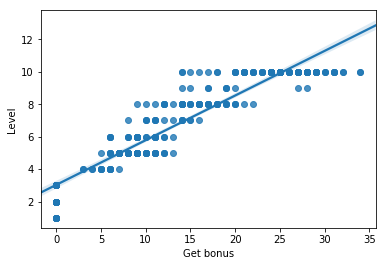

In [86]:
seaborn.regplot(b['Get bonus'], b['Level'], b)

In [87]:
# Looking at r-value, we can observe that there is a strong relationship between 
# explanatory variable Get bonus and dependent variable Buy bonus Version 2. Hypothesis on a causal relationship of 
# Get bonus on Buy bonus is discussed in the Analytical note
stats.linregress(b['Get bonus'], b['Buy bonus'])

LinregressResult(slope=1.6883726355825768, intercept=16.919589001369626, rvalue=0.82554115871147093, pvalue=5.0893490700997528e-76, stderr=0.066859596053823356)

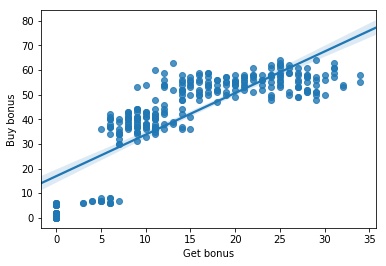

In [88]:
seaborn.regplot(b['Get bonus'], b['Buy bonus'], b)